In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set up Data

In [2]:
#Load covid-19 data from European Centre for Disease Prevention and Control website
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-04-24.xlsx'
df = pd.read_excel(url)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-20,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
12796,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12797,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
12798,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12799,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


# Covid-19 Analysis by Continents

In [3]:
df_continents = df.groupby(['continentExp'])['cases','deaths'].agg('sum')
df_continents

,cases,deaths
continentExp,,
Africa,27221,1286
America,1042525,58917
Asia,431034,16139
Europe,1158623,113788
Oceania,8036,99
Other,696,7


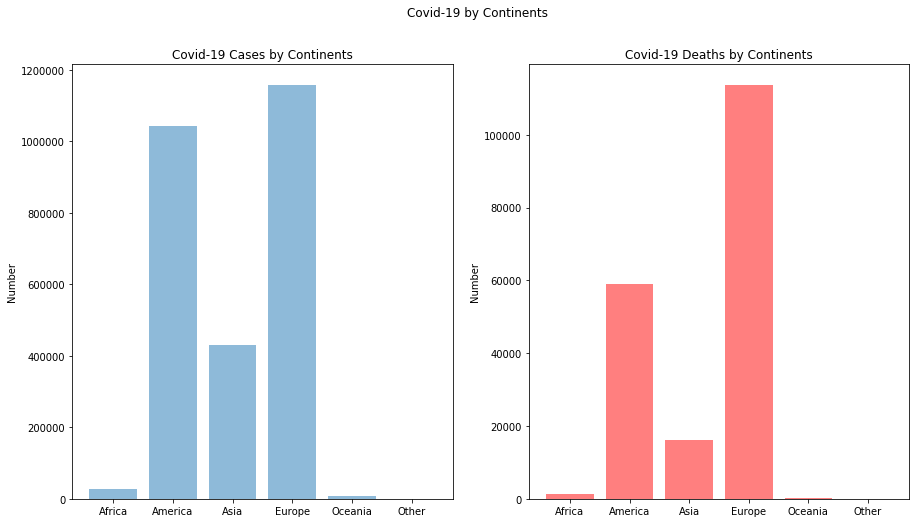

In [4]:
# Create figure and plot space
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
fig1.suptitle('Covid-19 by Continents')

plt.subplot(1, 2, 1)
plt.bar(np.arange(len(df_continents['cases'])), df_continents['cases'], align='center', alpha=0.5)
plt.xticks(range(len(df_continents.index)), df_continents.index)
plt.ylabel('Number')
plt.title('Covid-19 Cases by Continents')

plt.subplot(1, 2, 2)
plt.bar(np.arange(len(df_continents['deaths'])), df_continents['deaths'], align='center', alpha=0.5, color = 'red')
plt.xticks(range(len(df_continents.index)), df_continents.index)
plt.ylabel('Number')
plt.title('Covid-19 Deaths by Continents')

plt.show()

## Draw Pie Chart

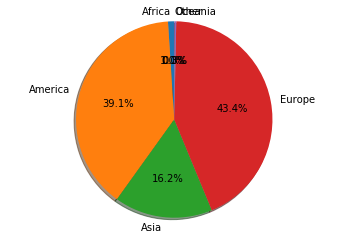

In [5]:
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice

fig3, ax5 = plt.subplots()
ax5.pie(df_continents['cases'], explode=explode, labels=df_continents.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Covid-19 Analysis by Countries

In [6]:
df_countries = df.groupby(['countriesAndTerritories'])['cases','deaths'].agg('sum')
df_countries = df_countries.drop('Cases_on_an_international_conveyance_Japan')
df_countries_top10 = df_countries.sort_values(by=['cases'], ascending = False).head(10)
df_countries_top10

,cases,deaths
countriesAndTerritories,,
United_States_of_America,869172,49963
Spain,213024,22157
Italy,189973,25549
Germany,150383,5321
United_Kingdom,138078,18738
France,120804,21856
Turkey,101790,2491
Iran,87026,5481
China,83884,4636


Population data

In [7]:
df_population = df.groupby(['countriesAndTerritories'])['countriesAndTerritories','popData2018'].agg('mean')
pd.DataFrame(df_population)

,popData2018
countriesAndTerritories,
Afghanistan,37172386.0
Albania,2866376.0
Algeria,42228429.0
Andorra,77006.0
Angola,30809762.0
...,...
Venezuela,28870195.0
Vietnam,95540395.0
Yemen,28498687.0


In [8]:
mergedDf = df_countries.merge(df_population, left_index=True, right_index=True)
mergedDf.loc['Turkey']

cases            101790.0
deaths             2491.0
popData2018    82319724.0
Name: Turkey, dtype: float64

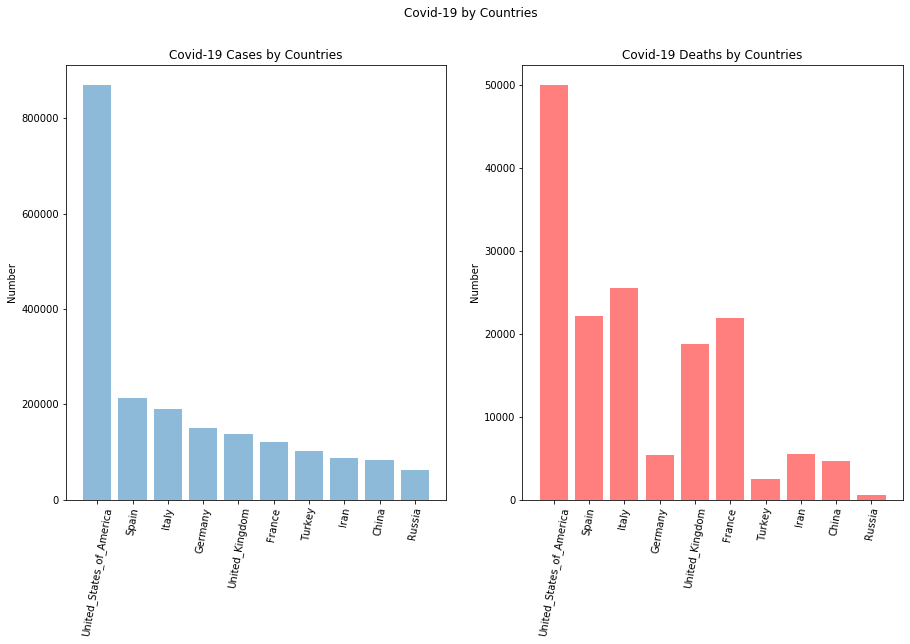

In [9]:
# Create figure and plot space
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,8))
fig2.suptitle('Covid-19 by Countries')

plt.subplot(1, 2, 1)
plt.bar(np.arange(len(df_countries_top10['cases'])), df_countries_top10['cases'], align='center', alpha=0.5)
plt.xticks(range(len(df_countries_top10.index)), df_countries_top10.index)
degrees = 80
plt.xticks(rotation=degrees)
plt.ylabel('Number')
plt.title('Covid-19 Cases by Countries')

plt.subplot(1, 2, 2)
plt.bar(np.arange(len(df_countries_top10['deaths'])), df_countries_top10['deaths'], align='center', alpha=0.5, color = 'red')
plt.xticks(range(len(df_countries_top10.index)), df_countries_top10.index)
plt.xticks(rotation=degrees)
plt.ylabel('Number')
plt.title('Covid-19 Deaths by Countries')

plt.show()

## Total confirmed COVID-19 cases per million people

In [10]:
mergedDf['casesPer1M'] = mergedDf.apply(lambda row: row.cases*1000000.0 / row.popData2018, axis=1)
mergedDf_top10 = mergedDf.sort_values(by=['casesPer1M'], ascending = False)[mergedDf['popData2018'] > 1000000].head(10)
mergedDf_top10


C:\Users\salim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,cases,deaths,popData2018,casesPer1M
countriesAndTerritories,,,,
Spain,213024,22157,46723749.0,4559.223191
Belgium,42797,6490,11422068.0,3746.869656
Ireland,17607,794,4853506.0,3627.686872
Switzerland,28414,1267,8516543.0,3336.330246
Italy,189973,25549,60431283.0,3143.620168
Qatar,7764,10,2781677.0,2791.122046
United_States_of_America,869172,49963,327167434.0,2656.658058
Portugal,22353,820,10281762.0,2174.043710
United_Kingdom,138078,18738,66488991.0,2076.704698


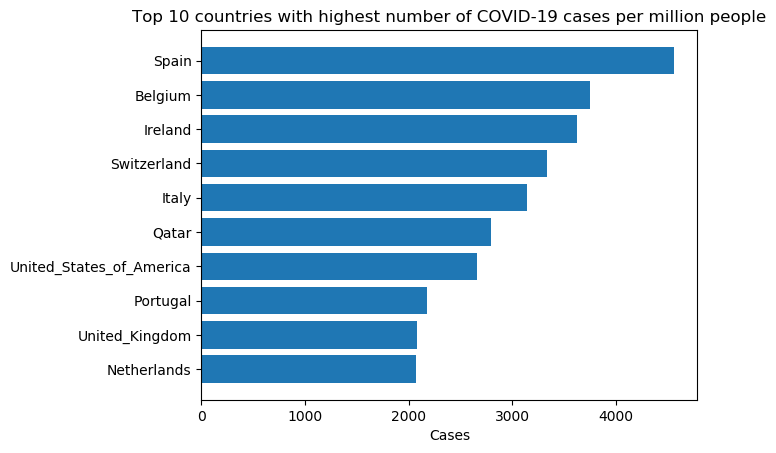

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(mergedDf_top10.index))

ax.barh(y_pos, mergedDf_top10.casesPer1M, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(mergedDf_top10.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cases')
ax.set_title('Top 10 countries with highest number of COVID-19 cases per million people')

plt.show()

## Total confirmed COVID-19 deaths per million people

In [12]:
mergedDf['deathsPer1M'] = mergedDf.apply(lambda row: row.deaths*1000000.0 / row.popData2018, axis=1)
mergedDf_top10 = mergedDf.sort_values(by=['deathsPer1M'], ascending = False)[mergedDf['popData2018'] > 1000000].head(10)
mergedDf_top10

C:\Users\salim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,cases,deaths,popData2018,casesPer1M,deathsPer1M
countriesAndTerritories,,,,,
Belgium,42797,6490,11422068.0,3746.869656,568.198333
Spain,213024,22157,46723749.0,4559.223191,474.212803
Italy,189973,25549,60431283.0,3143.620168,422.777719
France,120804,21856,66987244.0,1803.388120,326.271073
United_Kingdom,138078,18738,66488991.0,2076.704698,281.821091
Netherlands,35729,4177,17231017.0,2073.528219,242.411693
Sweden,16755,2021,10183175.0,1645.361098,198.464624
Ireland,17607,794,4853506.0,3627.686872,163.593081
United_States_of_America,869172,49963,327167434.0,2656.658058,152.713855


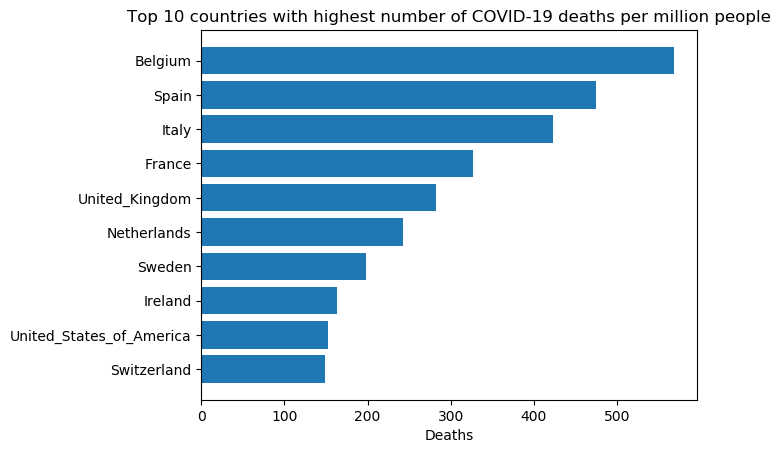

In [13]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(mergedDf_top10.index))

ax.barh(y_pos, mergedDf_top10.deathsPer1M, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(mergedDf_top10.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Deaths')
ax.set_title('Top 10 countries with highest number of COVID-19 deaths per million people')

plt.show()

## Turkey's Data

In [14]:
#Turkey's Data Frame
df_turkey = df[df['countriesAndTerritories'] == 'Turkey']
df_turkey.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
11919,2020-04-24,24,4,2020,3116,115,Turkey,TR,TUR,82319724.0,Asia
11920,2020-04-23,23,4,2020,3083,117,Turkey,TR,TUR,82319724.0,Asia
11921,2020-04-22,22,4,2020,4611,119,Turkey,TR,TUR,82319724.0,Asia
11922,2020-04-21,21,4,2020,4674,123,Turkey,TR,TUR,82319724.0,Asia
11923,2020-04-20,20,4,2020,3977,127,Turkey,TR,TUR,82319724.0,Asia


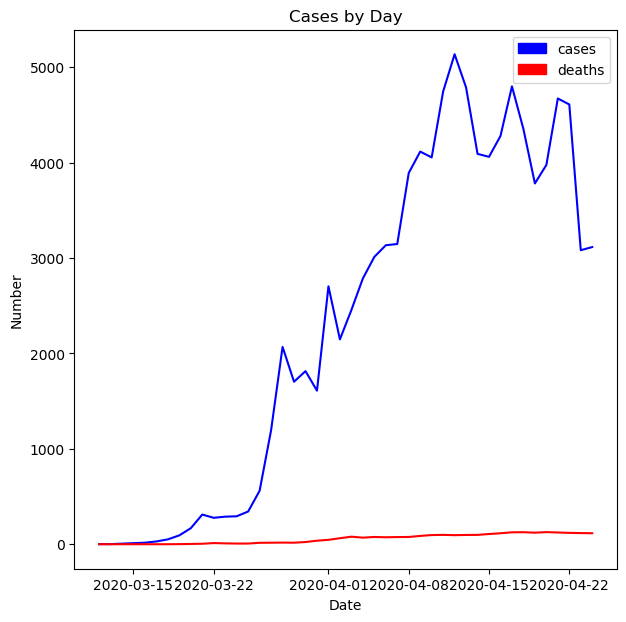

In [15]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(7, 7))

# Add x-axis and y-axis
ax.plot(df_turkey['dateRep'],
        df_turkey['cases'],
        color='blue', label='cases')

ax.plot(df_turkey['dateRep'],
        df_turkey['deaths'],
        color='red', label='deaths')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number",
       title="Cases by Day")

# Create another legend for the second line.

red_patch = mpatches.Patch(color='red', label='deaths', linestyle='solid')
blue_patch = mpatches.Patch(color='blue', label='cases', linestyle='solid')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.show()

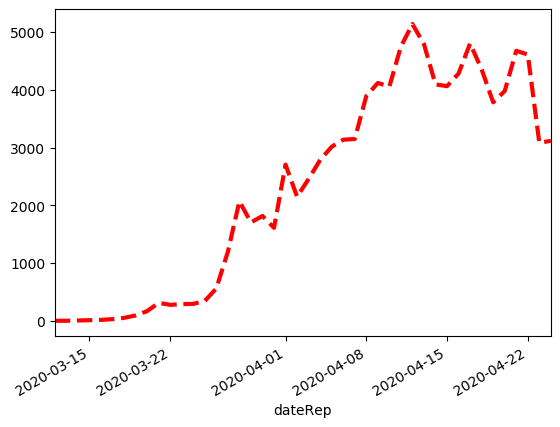

In [16]:
timeseries = pd.Series(list(pd.to_numeric(df_turkey['cases'], downcast='float')), index=df_turkey['dateRep'])
timeseries.plot(color='red', linestyle='dashed', linewidth=3, markersize=12)

## Germany's Data Frame

In [17]:
#Germany's Data Frame
df_turkey = df[df['countriesAndTerritories'] == 'Germany']
df_turkey.groupby(['year','month'])['cases','deaths'].agg('sum')

cases  deaths
year month               
2019 12         0       0
2020 1          5       0
     2         52       0
     3      61856     583
     4      88470    4738

## Scatterplot

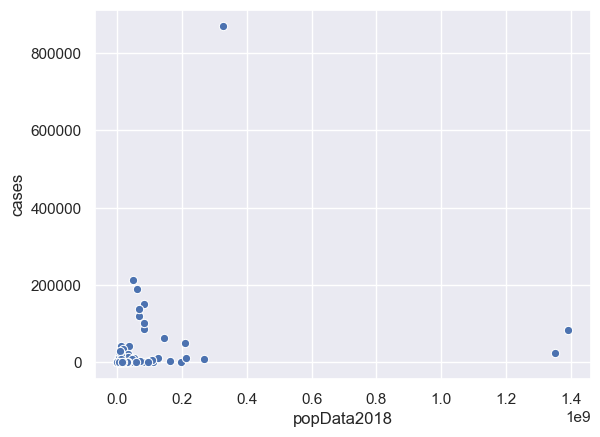

In [18]:
import seaborn as sns
sns.set()

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="popData2018", y="cases",
                     palette=cmap, sizes=(10, 200),
                     data=mergedDf)

In [19]:
df_count_per_capita = df.groupby(['countriesAndTerritories'])['cases','deaths'].agg('sum')


In [20]:
mergedDf

,cases,deaths,popData2018,casesPer1M,deathsPer1M
countriesAndTerritories,,,,,
Afghanistan,1281,42,37172386.0,34.461065,1.129871
Albania,663,27,2866376.0,231.302523,9.419560
Algeria,3007,407,42228429.0,71.207953,9.638057
Andorra,724,37,77006.0,9401.864790,480.482040
Angola,25,2,30809762.0,0.811431,0.064914
...,...,...,...,...,...
Venezuela,298,10,28870195.0,10.322064,0.346378
Vietnam,268,0,95540395.0,2.805096,0.000000
Yemen,1,0,28498687.0,0.035089,0.000000
